# Ejemplo de Clase

Primer ejemplo de **Machine Learnig** sobre la clidad de vida dado el PIB per Cápita

- Importar los datos
- Limpiarlos y concatenarlos
- Predicción usado <font color = "blue">Regresión Lineal</font>


[Github - juanjosegdoj](https://github.com/juanjosegdoj)

$$ y = m*x +b$$

In [1]:
import os
datapath = os.path.join("datasets","lifesat","")

#### Asignando los tamaños a los tooltips de los graficos

In [2]:
import matplotlib as mpl
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

#### Importamos las librerias necesarias

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import sklearn

%matplotlib inline

#### Cargamos los datos necesarios

In [4]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', 
                           delimiter='\t',encoding='latin1',na_values='n/a')

In [5]:
oecd_bli[oecd_bli['Country'] == 'Australia'].head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
37,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,MN,Men,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
73,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,WMN,Women,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
109,AUS,Australia,HO_HISH,Housing expenditure,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,20.0,NaN,NaN
146,AUS,Australia,HO_HISH,Housing expenditure,L,Value,MN,Men,PC,Percentage,0,units,NaN,NaN,20.0,E,Estimated value


#### Reformateamos el DataFrame de modo que el indice sea el pais y cada columna sea cada posible valor tomado por Indicator

In [6]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]== "TOT"]

In [7]:
oecd_bli['Indicator'].value_counts()

Life satisfaction                            37
Long-term unemployment rate                  37
Household net adjusted disposable income     37
Assault rate                                 37
Student skills                               37
Time devoted to leisure and personal care    37
Self-reported health                         37
Personal earnings                            37
Employees working very long hours            37
Job security                                 37
Homicide rate                                37
Dwellings without basic facilities           37
Voter turnout                                37
Housing expenditure                          37
Water quality                                37
Quality of support network                   37
Air pollution                                37
Rooms per person                             37
Consultation on rule-making                  37
Educational attainment                       37
Life expectancy                         

In [8]:
oecd_bli = oecd_bli.pivot(index = 'Country', columns = 'Indicator', values = 'Value')

In [9]:
oecd_bli.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


#### Renombramos "2015" por "GDP per Capita" para mejor compresion
- inplace = True --> Sobreescribe los datos

In [10]:
gdp_per_capita.rename(columns={"2015":"GDP per Capita"}, inplace = True) 
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


#### Indice --> Country

In [11]:
gdp_per_capita.set_index("Country", inplace = True)

#### Juntamos los datafames, Poniendo a la izquierda oecd_bli y a la derecha 

In [12]:
full_country_stats = pd.merge(left=oecd_bli,
                              right = gdp_per_capita,
                              left_index = True,
                              right_index = True
                             )
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,14.46,75.0,94.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,15.71,89.0,87.0,18.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,14.25,61.0,91.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0


In [13]:
print("   - Dimensiones -")
print("oecd_bli: ", oecd_bli.shape)
print("gdp_per_capita: ", gdp_per_capita.shape)
print("full_country_stats: ", full_country_stats.shape)

   - Dimensiones -
oecd_bli:  (37, 24)
gdp_per_capita:  (190, 6)
full_country_stats:  (36, 30)


#### Ordenamos del que menos gana al que mas gana

In [14]:
full_country_stats.sort_values(by='GDP per Capita', inplace = True)

#### Determinamos la cantidad de registros que tiene el Dataframe y la cantidad de columnas

#### Removemos los indices que vamos a usar en las pruebas y mantenemos los que usamos para entrenamiento

In [15]:
remove_indices = [0,1,6,8,33,34,35]
keep_indices = [i for i in range(36) if i not in remove_indices]
# keep_indices = list(set(range(36)) - set(remove_indices))
print(remove_indices, keep_indices)

[0, 1, 6, 8, 33, 34, 35] [2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


#### Obtenemos el dataset necesario

In [16]:
sample_data = full_country_stats[['GDP per Capita','Life satisfaction']].iloc[keep_indices]
sample_data

,GDP per Capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [17]:
#### Obtenemos los datos para las pruebas

In [18]:
missing_data = full_country_stats[['GDP per Capita', 'Life satisfaction']].iloc[remove_indices]
print(missing_data.shape)
missing_data.head()

(7, 2)


,GDP per Capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4


#### Extraemos los datos del DataFrame

In [19]:
country_stats = sample_data
X = np.c_[country_stats["GDP per Capita"]]
y = np.c_[country_stats["Life satisfaction"]]

(0, 10)

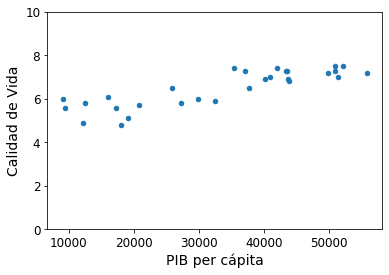

In [20]:
country_stats.plot(kind = 'scatter', x = 'GDP per Capita', y = 'Life satisfaction')
plt.xlabel("PIB per cápita")
plt.ylabel("Calidad de Vida")
plt.ylim([0,10])

In [21]:
gdp_per_capita.loc['Colombia']

Subject Descriptor               Gross domestic product per capita, current prices
Units                                                                 U.S. dollars
Scale                                                                        Units
Country/Series-specific Notes    See notes for:  Gross domestic product, curren...
GDP per Capita                                                             6083.51
Estimates Start After                                                         2014
Name: Colombia, dtype: object

# Regresión Lineal

#### Creamos el modelo

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### Entrenamos el modelo

In [23]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Probamos con un nuevo pais (Chipre)

In [24]:
X_new = [[6083.51]]
model.predict(X_new)

array([[5.15184711]])

#### Verificamos la pendiente 'coef_' y el intercepto 'intercept_' del modelo

In [25]:
to, t1 = model.intercept_[0], model.coef_[0][0]

In [26]:
#with pd.option_context('display.max_rows', None):
 #   print(oecd_bli)

In [27]:
len(gdp_per_capita['GDP per Capita'] )

190

# K Nearest Neighbors

In [28]:
X_new = [[gdp_per_capita.loc['Colombia', 'GDP per Capita']]]
modelKNN = KNeighborsRegressor(n_neighbors=3)
modelKNN.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [29]:
print("La predicción de Colombia para KNN", modelKNN.predict(X_new))

La predicción de Colombia para KNN [[5.5]]


### Extrayendo los parámetros del modelo entrenado

In [30]:
lin_reg_full = LinearRegression()
xfull = np.c_[full_country_stats["GDP per Capita"]]
yfull = np.c_[full_country_stats['Life satisfaction']]
lin_reg_full.fit(xfull, yfull)

tofull, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]

In [31]:
tofull, t1full 
sample_data.columns

Index(['GDP per Capita', 'Life satisfaction'], dtype='object')

## Penalización agregando un hiperpatametro

In [32]:
ridge = sklearn.linear_model.Ridge(alpha = 800000000)
ridge.fit(X, y)

t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]

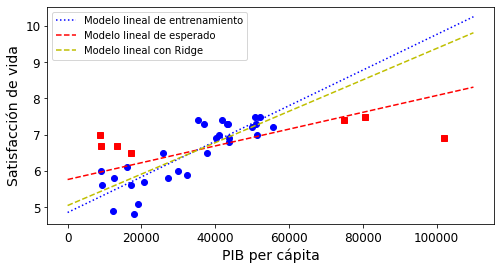

In [33]:
plt.figure(figsize=(8,4))
plt.xlabel('PIB per cápita')
plt.ylabel('Satisfacción de vida')

plt.plot(list(sample_data['GDP per Capita']), list(sample_data['Life satisfaction']), 'bo')
plt.plot(list(missing_data['GDP per Capita']), list(missing_data['Life satisfaction']), 'rs')

x = np.linspace(0, 110000, 1000)
plt.plot(x, to + x*t1, 'b:', label= "Modelo lineal de entrenamiento")
plt.plot(x, tofull + x*t1full, 'r--', label= "Modelo lineal de esperado")
plt.plot(x, t0ridge+ t1ridge*x, 'y--', label= "Modelo lineal con Ridge")
plt.legend(loc='upper left')

**NOTA:**  No tiene sentido hacer el test hasta que el accuracy en los datos de Test sea considerablmente bueno.

# Proceso
1. Divido datos de entrenamiento 80% y datos de test 20%.
2. Luego a los datos de entrenamiento los divido en datos de validación y datos de entrnamiento.
3. Estos datos de validación me permite seleccionar el mejor alfa de los datos
4. Posteriormente vuelvo a juntar los datos de validación y entrenamiento y reentreno el modelo con el lambda seleccionado en el  paso 3.
5. Y ahora si miro el accuracy con los datos de prueba que nunca vieron el modelo.

In [34]:
gdp_per_capita

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13588.846,2013.0
Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3534.860,2014.0
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
